In [1]:
#**************************************************************************************************************************************
#                                             Singular-Value Decomposition (SVD)                                                      *
#                                                                                                                                     *
#    This code performs dimensionality reduction using Singular Value Decomposition (SVD) and visualizes the results.                 *
#    This code allows for an understanding of how dimensionality reduction affects the data and provides visualizations to aid        *
#    in the analysis. It's particularly useful for exploring high-dimensional datasets and understanding the underlying structure.    *
#                                                                                                                                     *
#**************************************************************************************************************************************

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
class SVD:
    @staticmethod
    def custom_transpose(matrix):
        """
        Custom implementation of matrix transpose.
        """

        transposed = [[0 for _ in range(len(matrix))] for _ in range(len(matrix[0]))]       # Initialize transposed matrix
        for i in range(len(matrix)):                                                        # Transpose the matrix
            for j in range(len(matrix[0])):
                transposed[j][i] = matrix[i][j]

        return transposed

    @staticmethod
    def custom_eig(cov_matrix):
        """
        Custom implementation of eigenvalue decomposition.
        """

        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)                               # Compute eigenvalues and eigenvectors using numpy
        sorted_indices = np.argsort(-eigenvalues)                                           # Sort eigenvalues and eigenvectors
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        return eigenvalues, eigenvectors

    @staticmethod
    def svd(X, k=None):
        """
        Perform Singular Value Decomposition (SVD) on the input matrix X.

        Parameters:
          - X (numpy.ndarray): Input matrix of shape (m, n).
          - k (int): Number of top singular values to retain for dimensionality reduction. If None, retains all singular values.

        Returns:
          - U (numpy.ndarray): Left singular vectors of shape (m, k).
          - S (numpy.ndarray): Singular values in descending order of shape (k,).
          - Vt (numpy.ndarray): Right singular vectors of shape (k, n).
        """

        cov_matrix = np.dot(SVD.custom_transpose(X), X)                                     # Step 1: Compute X^T * X and find its eigenvalues and eigenvectors
        eigenvalues, eigenvectors = SVD.custom_eig(cov_matrix)

        singular_values = np.sqrt(eigenvalues)                                              # Step 2: Compute the singular values and sort them in descending order
        sorted_indices = np.argsort(-singular_values)
        singular_values = singular_values[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        Vt = eigenvectors.T                                                                 # Step 3: Compute right singular vectors

        if k is None:                                                                       # Step 4: Compute left singular vectors (U)
            U = np.dot(X, Vt.T)
        else:
            U = np.dot(X, Vt.T[:, :k])

        S = singular_values / np.linalg.norm(singular_values)                               # Normalize singular values
        return U, S, Vt, singular_values, eigenvectors

In [4]:
def banner():
    print("""


***************************************************************************************************************************
*                                         Singular-Value Decomposition (SVD)                                              *
*                                                                                                                         *
*     Singular Value Decomposition (SVD) is a powerful technique in linear algebra used for dimensionality reduction,     *
*     feature extraction, and data compression. It decomposes a matrix into three matrices: U, S, and Vt, where:          *
*                                                                                                                         *
*             - U: Left singular vectors                                                                                  *
*             - S: Singular values (diagonal matrix)                                                                      *
*             - Vt: Right singular vectors (transposed)                                                                   *
*             SVD is particularly useful for analyzing and visualizing high-dimensional data.                             *
*                                                                                                                         *
*     Usage:                                                                                                              *
*             1. Load your dataset into a pandas DataFrame.                                                               *
*             2. Extract features and labels from the dataset.                                                            *
*             3. Call the 'svd' function with your data matrix X and specify the number of dimensions (k) to retain.      *
*             4. Visualize the results using the provided DimensionalityReductionVisualizer.                              *
*             5. Experiment with different values of k to find the optimal number of dimensions for your analysis.        *
*                                                                                                                         *
***************************************************************************************************************************
  """)


banner()
dataset = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")                        # Load the dataset
X = dataset.drop(columns=["target"]).values                                               # Extract features and labels
U, S, Vt, singular_values, eigenvectors = SVD.svd(X)                                      # Perform SVD
k = int(input("\n---> Enter the value of k for dimensionality reduction: "))              # Number of dimensions to retain
X_reduced = np.dot(X, Vt.T[:, :k])                                                        # Dimensionality reduction

print("\n***************************************************************************************************************************\n")
# Print the results
print("---> Left Singular Vectors (U):\n")
print(U)
print("\n***************************************************************************************************************************\n")
print("---> Singular Values (S):\n")
print(S)
print("\n***************************************************************************************************************************\n")
print("---> \nRight Singular Vectors (Vt):\n")
print(Vt)
print("\n***************************************************************************************************************************\n")
print("---> \nSingular Values:\n")
print(singular_values)
print("\n***************************************************************************************************************************\n")
print("---> \nEigenvectors:\n")
print(eigenvectors)
print("\n***************************************************************************************************************************\n")
print("---> \nReduced Dataset:\n")
print(X_reduced)





***************************************************************************************************************************
*                                         Singular-Value Decomposition (SVD)                                              *
*                                                                                                                         *
*     Singular Value Decomposition (SVD) is a powerful technique in linear algebra used for dimensionality reduction,     *
*     feature extraction, and data compression. It decomposes a matrix into three matrices: U, S, and Vt, where:          *
*                                                                                                                         *
*             - U: Left singular vectors                                                                                  *
*             - S: Singular values (diagonal matrix)                                                                      *
*    

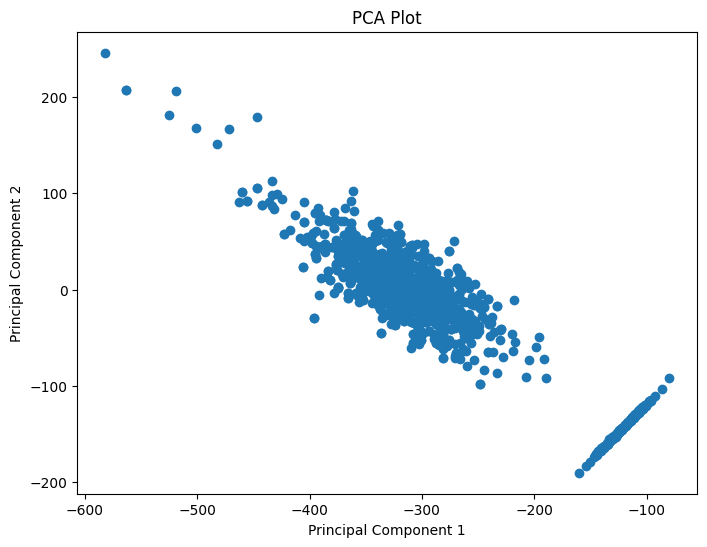

In [5]:
def pca_plot(X_reduced, dimensions=2):
    """
    Plot PCA based on specified dimensions.
    """

    if dimensions not in [2, 3]:                                                      # Check if the specified dimensions are valid
        raise ValueError("Dimensions must be 2 or 3 for PCA plot.")
    fig = plt.figure(figsize=(8, 6))                                                  # Create a figure
    if dimensions == 2:                                                               # Plot 2D PCA if dimensions=2, otherwise plot 3D PCA
        plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2])
        ax.set_xlabel("Principal Component 1")
        ax.set_ylabel("Principal Component 2")
        ax.set_zlabel("Principal Component 3")
    plt.title("PCA Plot")
    plt.show()



pca_plot(X_reduced, dimensions=2)                                                     # Generate and display the plots

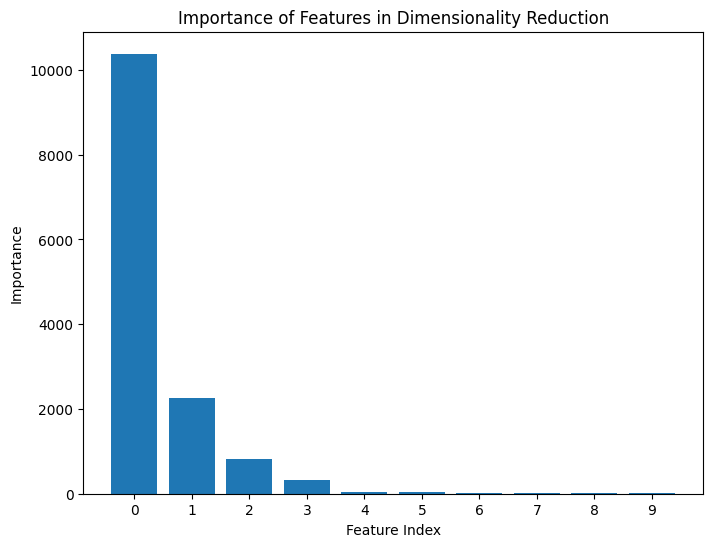

In [6]:
def importance_plot(singular_values, n_features=10):
    """
    Plot the importance of features in dimensionality reduction.
    """

    fig = plt.figure(figsize=(8, 6))                                                  # Create a figure
    indices = np.argsort(singular_values)[::-1][:n_features]                          # Sort the singular values indices in descending order
    plt.bar(range(n_features), singular_values[indices], align='center')              # Plot a bar chart of singular values for top features
    plt.xlabel("Feature Index")                                                       # Set labels and title
    plt.ylabel("Importance")
    plt.title("Importance of Features in Dimensionality Reduction")
    plt.xticks(range(n_features), indices)                                            # Set x ticks to represent the indices of top features
    plt.show()



importance_plot(singular_values, n_features=10)                                       # Generate and display the plots

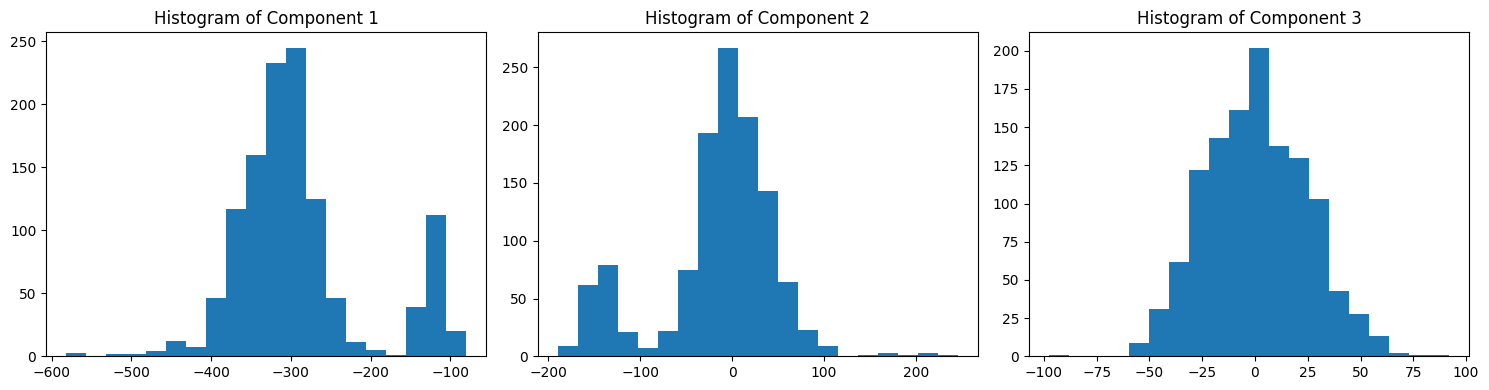

In [7]:
def std_dev_plot(X_reduced):
    """
    Plot the standard deviation of principal components.
    """

    fig, axes = plt.subplots(nrows=1, ncols=X_reduced.shape[1], figsize=(15, 4))      # Create subplots for each principal component

    for i in range(X_reduced.shape[1]):                                               # Plot histogram for each principal component
        axes[i].hist(X_reduced[:, i], bins=20)
        axes[i].set_title(f"Histogram of Component {i+1}")

    plt.tight_layout()                                                                # Adjust layout for better visualization
    plt.show()



std_dev_plot(X_reduced)                                                               # Generate and display the plots